## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -0.804294 -0.325391  1.638246  1.106494  0.197350  0.881665
1 -1.364243 -0.034436 -1.503114  0.737759 -1.684583 -0.277769
2  1.782938 -1.084109  0.473029 -0.362007 -1.346966 -0.673721
3 -0.741543 -0.159467 -1.082861 -0.931422  0.354373 -0.700426
4  0.031706 -1.465146  0.601101  0.661221  0.201978 -0.438246


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9968612	total: 56.6ms	remaining: 56.5s
1:	learn: 0.9886463	total: 57.3ms	remaining: 28.6s
2:	learn: 0.9798337	total: 57.7ms	remaining: 19.2s
3:	learn: 0.9695143	total: 58.2ms	remaining: 14.5s
4:	learn: 0.9606240	total: 58.7ms	remaining: 11.7s
5:	learn: 0.9526169	total: 59.1ms	remaining: 9.78s
6:	learn: 0.9436763	total: 59.5ms	remaining: 8.44s
7:	learn: 0.9362539	total: 59.9ms	remaining: 7.42s
8:	learn: 0.9271160	total: 60.4ms	remaining: 6.65s
9:	learn: 0.9198377	total: 60.9ms	remaining: 6.03s
10:	learn: 0.9109998	total: 61.3ms	remaining: 5.51s
11:	learn: 0.9008459	total: 61.7ms	remaining: 5.08s
12:	learn: 0.8909969	total: 62.1ms	remaining: 4.71s
13:	learn: 0.8831368	total: 62.7ms	remaining: 4.41s
14:	learn: 0.8762897	total: 63ms	remaining: 4.14s
15:	learn: 0.8688802	total: 63.5ms	remaining: 3.91s
16:	learn: 0.8610155	total: 63.9ms	remaining: 3.7s
17:	learn: 0.8520584	total: 64.3ms	remaining: 3.51s
18:	learn: 0.8447974	total: 64.6ms	remaining: 3

114:	learn: 0.3818201	total: 110ms	remaining: 846ms
115:	learn: 0.3786304	total: 111ms	remaining: 842ms
116:	learn: 0.3755766	total: 111ms	remaining: 838ms
117:	learn: 0.3729483	total: 111ms	remaining: 833ms
118:	learn: 0.3699053	total: 112ms	remaining: 828ms
119:	learn: 0.3674064	total: 112ms	remaining: 822ms
120:	learn: 0.3643303	total: 113ms	remaining: 817ms
121:	learn: 0.3619841	total: 113ms	remaining: 812ms
122:	learn: 0.3595455	total: 113ms	remaining: 808ms
123:	learn: 0.3562932	total: 114ms	remaining: 804ms
124:	learn: 0.3540099	total: 114ms	remaining: 799ms
125:	learn: 0.3515549	total: 115ms	remaining: 797ms
126:	learn: 0.3493151	total: 115ms	remaining: 793ms
127:	learn: 0.3460113	total: 116ms	remaining: 788ms
128:	learn: 0.3433850	total: 116ms	remaining: 785ms
129:	learn: 0.3406047	total: 117ms	remaining: 781ms
130:	learn: 0.3382715	total: 117ms	remaining: 776ms
131:	learn: 0.3363986	total: 117ms	remaining: 771ms
132:	learn: 0.3340315	total: 118ms	remaining: 768ms
133:	learn: 

283:	learn: 0.1167889	total: 187ms	remaining: 472ms
284:	learn: 0.1160946	total: 188ms	remaining: 470ms
285:	learn: 0.1151279	total: 188ms	remaining: 470ms
286:	learn: 0.1143480	total: 189ms	remaining: 468ms
287:	learn: 0.1136591	total: 189ms	remaining: 467ms
288:	learn: 0.1128770	total: 189ms	remaining: 466ms
289:	learn: 0.1121265	total: 190ms	remaining: 465ms
290:	learn: 0.1114809	total: 190ms	remaining: 464ms
291:	learn: 0.1107035	total: 191ms	remaining: 463ms
292:	learn: 0.1099553	total: 191ms	remaining: 462ms
293:	learn: 0.1092304	total: 192ms	remaining: 460ms
294:	learn: 0.1086373	total: 192ms	remaining: 460ms
295:	learn: 0.1078440	total: 193ms	remaining: 458ms
296:	learn: 0.1069799	total: 193ms	remaining: 458ms
297:	learn: 0.1063541	total: 194ms	remaining: 456ms
298:	learn: 0.1057890	total: 194ms	remaining: 456ms
299:	learn: 0.1051733	total: 195ms	remaining: 455ms
300:	learn: 0.1045009	total: 195ms	remaining: 454ms
301:	learn: 0.1038785	total: 196ms	remaining: 453ms
302:	learn: 

504:	learn: 0.0382409	total: 293ms	remaining: 287ms
505:	learn: 0.0381399	total: 294ms	remaining: 287ms
506:	learn: 0.0379161	total: 294ms	remaining: 286ms
507:	learn: 0.0378880	total: 295ms	remaining: 285ms
508:	learn: 0.0377118	total: 295ms	remaining: 284ms
509:	learn: 0.0374872	total: 295ms	remaining: 284ms
510:	learn: 0.0372822	total: 296ms	remaining: 283ms
511:	learn: 0.0370685	total: 296ms	remaining: 282ms
512:	learn: 0.0370411	total: 297ms	remaining: 282ms
513:	learn: 0.0368029	total: 297ms	remaining: 281ms
514:	learn: 0.0365696	total: 298ms	remaining: 280ms
515:	learn: 0.0363661	total: 298ms	remaining: 280ms
516:	learn: 0.0363391	total: 298ms	remaining: 279ms
517:	learn: 0.0361130	total: 299ms	remaining: 278ms
518:	learn: 0.0359789	total: 299ms	remaining: 277ms
519:	learn: 0.0359525	total: 300ms	remaining: 277ms
520:	learn: 0.0359263	total: 301ms	remaining: 277ms
521:	learn: 0.0357178	total: 301ms	remaining: 276ms
522:	learn: 0.0356921	total: 302ms	remaining: 275ms
523:	learn: 

674:	learn: 0.0192816	total: 371ms	remaining: 179ms
675:	learn: 0.0191990	total: 372ms	remaining: 178ms
676:	learn: 0.0190811	total: 372ms	remaining: 178ms
677:	learn: 0.0190393	total: 373ms	remaining: 177ms
678:	learn: 0.0188988	total: 373ms	remaining: 176ms
679:	learn: 0.0188181	total: 374ms	remaining: 176ms
680:	learn: 0.0186856	total: 374ms	remaining: 175ms
681:	learn: 0.0186433	total: 374ms	remaining: 175ms
682:	learn: 0.0185640	total: 375ms	remaining: 174ms
683:	learn: 0.0184886	total: 375ms	remaining: 173ms
684:	learn: 0.0184108	total: 376ms	remaining: 173ms
685:	learn: 0.0183374	total: 376ms	remaining: 172ms
686:	learn: 0.0182474	total: 376ms	remaining: 171ms
687:	learn: 0.0181150	total: 377ms	remaining: 171ms
688:	learn: 0.0180392	total: 377ms	remaining: 170ms
689:	learn: 0.0180113	total: 378ms	remaining: 170ms
690:	learn: 0.0178868	total: 378ms	remaining: 169ms
691:	learn: 0.0177775	total: 378ms	remaining: 168ms
692:	learn: 0.0177502	total: 379ms	remaining: 168ms
693:	learn: 

903:	learn: 0.0086311	total: 477ms	remaining: 50.6ms
904:	learn: 0.0086126	total: 477ms	remaining: 50.1ms
905:	learn: 0.0085740	total: 478ms	remaining: 49.5ms
906:	learn: 0.0085511	total: 478ms	remaining: 49ms
907:	learn: 0.0085470	total: 478ms	remaining: 48.5ms
908:	learn: 0.0085420	total: 479ms	remaining: 47.9ms
909:	learn: 0.0085200	total: 479ms	remaining: 47.4ms
910:	learn: 0.0084974	total: 480ms	remaining: 46.9ms
911:	learn: 0.0084925	total: 480ms	remaining: 46.3ms
912:	learn: 0.0084877	total: 480ms	remaining: 45.8ms
913:	learn: 0.0084664	total: 481ms	remaining: 45.2ms
914:	learn: 0.0084442	total: 481ms	remaining: 44.7ms
915:	learn: 0.0084394	total: 482ms	remaining: 44.2ms
916:	learn: 0.0084044	total: 482ms	remaining: 43.7ms
917:	learn: 0.0083827	total: 483ms	remaining: 43.1ms
918:	learn: 0.0083491	total: 483ms	remaining: 42.6ms
919:	learn: 0.0083444	total: 483ms	remaining: 42ms
920:	learn: 0.0083399	total: 484ms	remaining: 41.5ms
921:	learn: 0.0083061	total: 484ms	remaining: 41ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

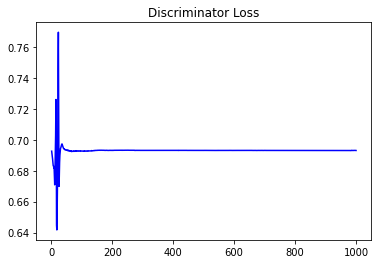

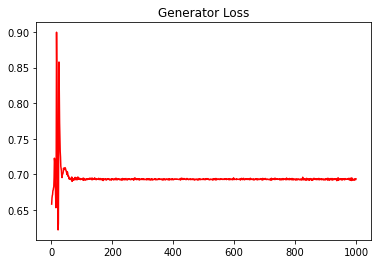

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.07808018160947282


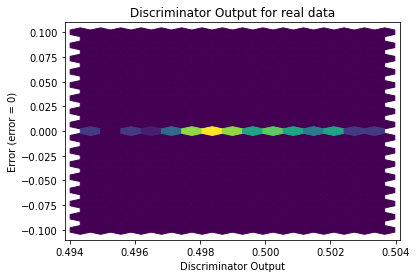

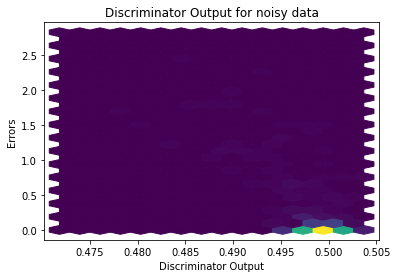

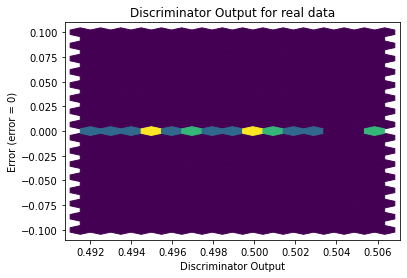

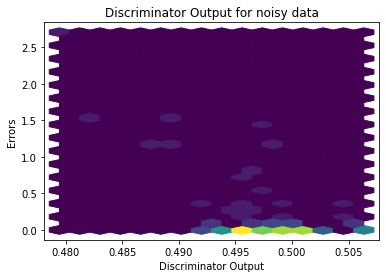

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


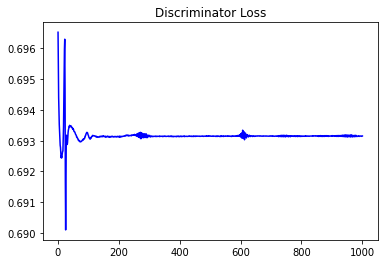

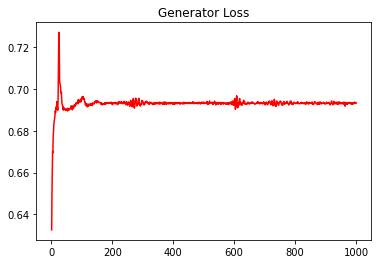

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.08451794496673859


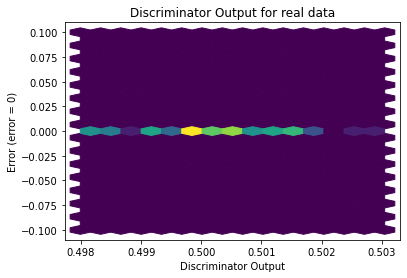

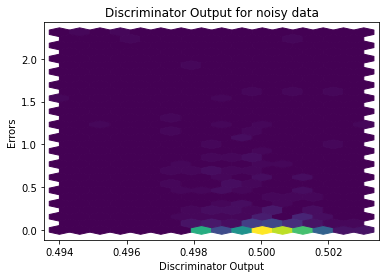

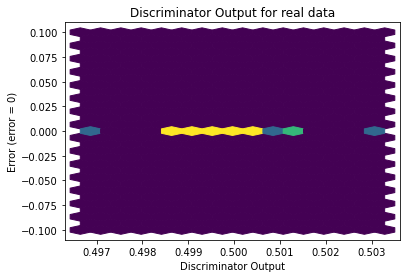

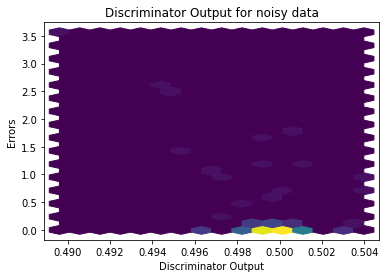

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0304]], requires_grad=True)
